<a href="https://colab.research.google.com/github/Arden-Zhu/fashion_net2/blob/master/Try_pyTorch_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 1

In [0]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from skimage import io
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from IPython.display import display 

import torchvision.transforms.functional as TF

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
my_drive_dir = "/content/gdrive/My Drive/Machine Learning"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## prepare images

In [5]:
since = time.time()
data_source_dir = os.path.join(my_drive_dir, 'Datasets\DeepFashion\Category and Attribute Prediction Benchmark'.replace('\\', '/'))
tar_file = os.path.join(data_source_dir, 'picked.tar')
if not os.path.exists('data'):
  os.mkdir('data')
! tar xf "{tar_file}" -C data/
print('%.3f' % (time.time() - since))

8.978


In [6]:
csv_file = os.path.join(data_source_dir, 'picked.csv')
df = pd.read_csv(csv_file, index_col=0)
df = df.loc[:, ['file', 'category_name', 'category_id']]
df['file'] = df.apply(lambda m: m.file[4:], axis=1)
df.head()

,file,category_name,category_id
23063,Kimono-Sleeved_Paisley_Blouse/img_00000121.jpg,Blouse,3
30780,Boxy_Chiffon_Pocket_Blouse/img_00000056.jpg,Blouse,3
13998,Crochet_Lace-Paneled_Blouse/img_00000035.jpg,Blouse,3
123023,New_York_City_Pocket_Tee/img_00000012.jpg,Tee,18
21889,Georgette_Tulip_Back_Blouse/img_00000029.jpg,Blouse,3


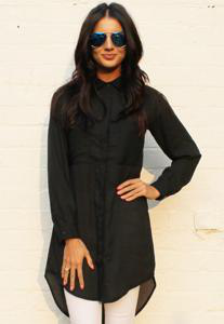

(224, 324)

In [7]:
im0 = Image.open('data/data/picked/Boxy_Chiffon_Pocket_Blouse/img_00000056.jpg')
resize = transforms.Resize(224)

im1 = resize(im0)
display(im1)
im1.size


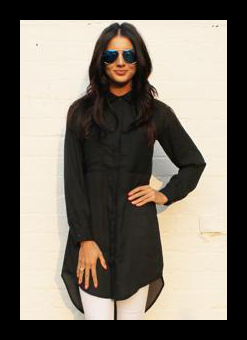

(247, 340)

In [8]:
tf = transforms.Pad(20)
im1 = tf(im0)
display(im1)
im1.size

In [9]:
im1 = TF.resize(im0, 224)
im1.size

(224, 324)

In [0]:
def padToSquare(img, **kwargs):
    """Pad the input PIL Image to a square

    Args:
        img (PIL Image): Image to be resized.

    Returns:
        PIL Image: Padding image.
    """
    if not TF._is_pil_image(img):
        raise TypeError('img should be PIL Image. Got {}'.format(type(img)))
    
    w, h = img.size
    diff = w - h

    if diff == 0:
      return img
    else:
      if diff < 0:
        padding = (-diff // 2, 0, diff // 2 - diff, 0)
      else:
        padding = (0, diff // 2, 0, diff - diff//2)

      return TF.pad(img, padding, **kwargs)


In [0]:
class PadToSquare():
    """ Pad the input PIL Image to a square
    """
    def __init__(self, **kwargs):
      self.params = kwargs

    def __call__(self, x):
      return padToSquare(x, **self.params)


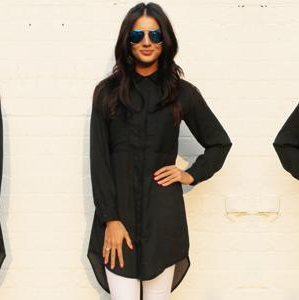

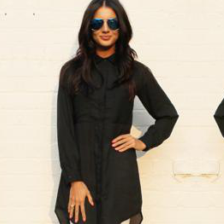

In [16]:
im2 = PadToSquare(padding_mode='reflect')(im0)
display(im2)

tfm= transforms.Compose([
  PadToSquare(padding_mode='reflect'),
  transforms.Resize(256),
  transforms.RandomCrop(224)
])

display(tfm(im0))

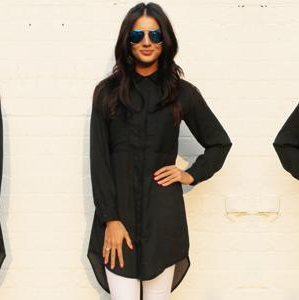

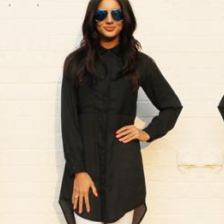

In [17]:
im2 = PadToSquare(padding_mode='reflect')(im0)
display(im2)

tfm= transforms.Compose([
  PadToSquare(padding_mode='reflect'),
  transforms.Resize(256),
  transforms.CenterCrop(224)
])

display(tfm(im0))